In [1]:
import numpy as np
import matplotlib.pyplot as plt
import particle_beam as pb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sys
from importlib import reload as rel
from scipy.special import gamma as gm
from scipy.integrate import simps
sys.path.insert(0, "../")
import Constants.SI as SI
global plasmaDict, c
plt.style.use('notes')

In [2]:
plasmaDict = {'Ar+' : {'Vi' : 15.75962, 'Name' :  'Ar$^{+}$', 'Z' : 1},
		   'Ar2+': {'Vi' : 27.62967, 'Name' : 'Ar$^{2+}$', 'Z' : 2},
		   'Ar3+': {'Vi' : 40.74, 'Name' : 'Ar$^{3+}$', 'Z' : 3},
		   'Ar4+': {'Vi' : 59.81, 'Name': 'Ar$^{4+}$', 'Z' : 4},
		   'Ar5+': {'Vi' : 	75.02, 'Name': 'Ar$^{5+}$', 'Z' : 5},
		   'He+': {'Vi' : 24.58741, 'Name': 'He$^{+}$', 'Z' : 1},
		   'He2+': {'Vi': 54.41778, 'Name': 'He$^{2+}$', 'Z' : 2}
}

In [3]:
# Variables to optimize
npoints = 100
Q = np.array([.1, 1.0, 1.5]) * 1e-9
sigma_z = np.linspace(5e-6, 10e-6, npoints)
sigma_r = np.linspace(5e-6, 10e-6, npoints)
sigma_r = np.reshape(sigma_r, (len(sigma_r), 1))

In [4]:
eb = pb.beam(Q = Q[0], sigma_z = sigma_z, sigma_r = sigma_r)
eb.peak_charge_dens()
eb.ppk.shape

(100, 100)

In [9]:
gas = 'He+'
eb.max_frac(plasmaDict[gas]['Vi'], plasmaDict[gas]['Z'])

In [10]:
i_y = np.argmin(np.min(eb.max_ion_frac,1))
i_x = np.argmin(np.min(eb.max_ion_frac,0))
scatter_y = sigma_z[i_y]*1e6
scatter_x = sigma_r[i_x]*1e6

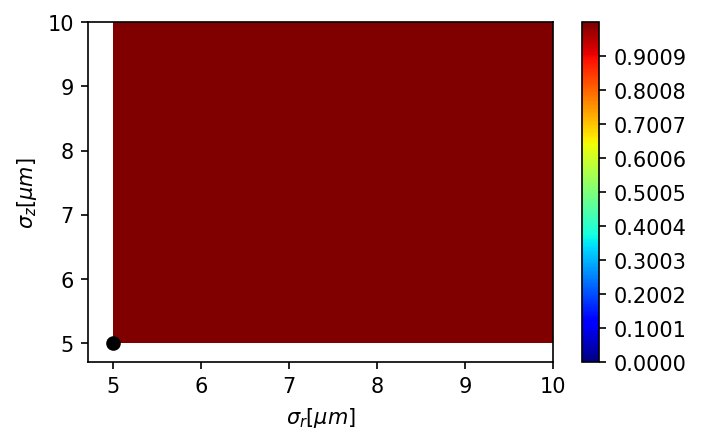

In [15]:
fig = plt.figure(figsize = (5,3), dpi = 150); ax = fig.gca()
levels = np.linspace(0, 1, 1000)
cont = plt.contourf(sigma_r[:,0]*1e6, sigma_z*1e6, eb.max_ion_frac, cmap = 'jet', levels = levels)
plt.scatter(scatter_x, scatter_y, c = 'k', marker = 'o')
plt.xlabel(r'$\sigma_r [\mu m]$')
plt.ylabel(r'$\sigma_z [\mu m]$')
plt.colorbar(mappable = cont)
plt.show()